# 一, 时域与频域分析

1. **时间域分析(Time Domain Analysis)**：
   - 时间域分析关注声音信号在时间上的变化。它包括对语音波形的振幅随时间的变化进行分析，通常以采样点或时间单位来表示。
   - 时间域分析用于检测语音信号中的基本音素、语速、音调、音强度等信息。
   

2. **频率域分析(Frequency Domain Analysis)**：
   - 频率域分析关注声音信号在频域上的特性，即声音信号中包含的不同频率成分。
   - 傅里叶变换是常用的频率域分析工具，它将声音信号从时间域转换为频率域，提供频谱信息。
   - 频率域分析用于分析语音信号的共振峰、谐波结构、频谱包络以及声音中的特定频率成分。


In [13]:
import wave
import numpy as np
from scipy import fft

# 读取音频文件
def read_wave(file_path):
    with wave.open(file_path, "rb") as file:
        # 获取音频文件的参数信息
        params = file.getparams()
        nchannels, sampwidth, framerate, nframes = params[:4]
        # 读取所有帧的音频数据并将其转换为numpy数组
        wave_data = np.frombuffer(file.readframes(nframes), dtype=np.int16)
    wave_data = wave_data.reshape(-1,nchannels).T
    time_table = np.arange(0, nframes) * (1.0/framerate)
    return wave_data, time_table

# 快速傅里叶变换
def wave_fft(wave_data, time_table, time_range=(-1,-1), inverse=False):
    assert(len(time_range) == 2)
    time_start, time_end = time_range if time_range != (-1,-1) else (0, time_table[-1])
    selected_indices = np.where((time_table >= time_start) & (time_table <= time_end))[0]
    fft_time = time_table[selected_indices]
    if not inverse:
        fft_data = fft.fft(wave_data[:, selected_indices], axis=1)
    else:
        fft_data = fft.ifft(wave_data[:, selected_indices], axis=1)
    return fft_data, fft_time

c:\Users\Henry\.conda\envs\deeplearn\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Henry\.conda\envs\deeplearn\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


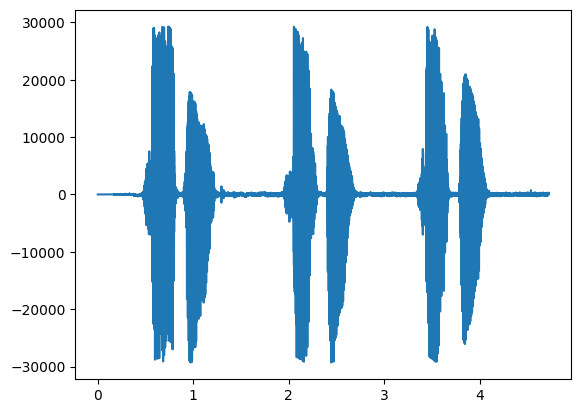

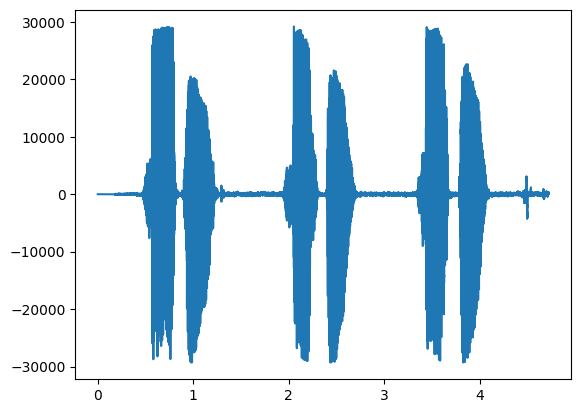

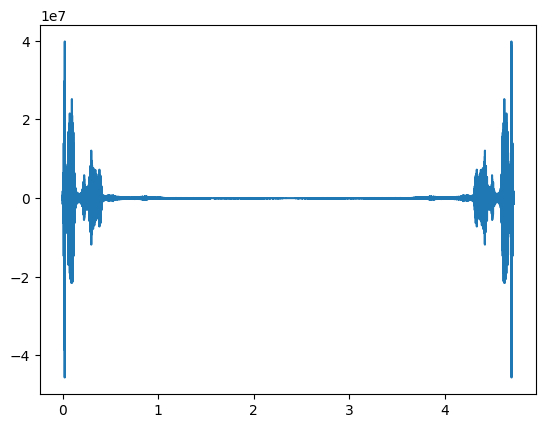

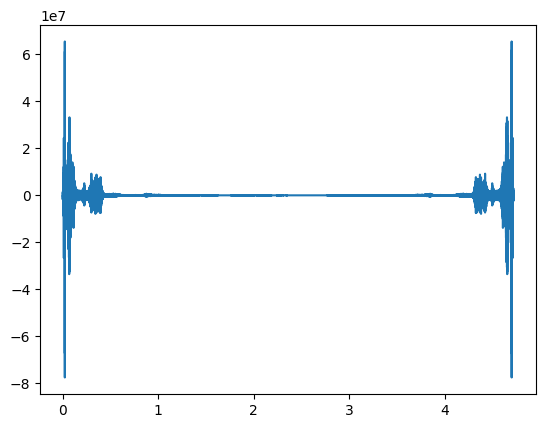

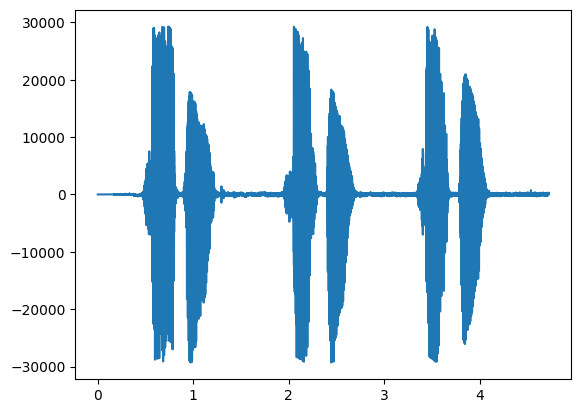

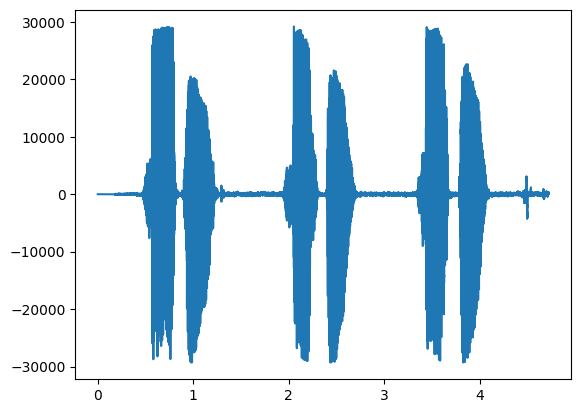

In [14]:
import matplotlib.pyplot as plt

wave_data, time_table = read_wave("./test/polite.wav")

for i in range(wave_data.shape[0]):
    plt.figure()
    plt.plot(time_table, wave_data[i])

fft_wave_data, fft_time_table = wave_fft(wave_data, time_table)

for i in range(fft_wave_data.shape[0]):
    plt.figure()
    plt.plot(fft_time_table, fft_wave_data[i])

ifft_wave_data, ifft_time_table = wave_fft(fft_wave_data, fft_time_table, inverse=True)

for i in range(ifft_wave_data.shape[0]):
    plt.figure()
    plt.plot(ifft_time_table, ifft_wave_data[i])